# Product Sales Forecasting in Retail Industry (Part 1)

### by Sooyeon Won

### Keywords
- Project with a Real-World Data
- Unsupervised Learning
- Data Visualisation
- Clustering/ Segmentation
- Classification 
- Time Series Forecasting 


## Table of Contents
<ul>
<li><a href="#Introduction">(Part 1) 1. Introduction</a></li> 
<li><a href="#Preparation">(Part 1) 2. Data Preparation</a></li>
<li><a href="#Exploration">(Part 1) 3. Data Exploration</a></li>
<li><a href="#Analysis">(Part 2/ 3) 4. Data Analysis</a></li>
    - (Part 2) 4.1. K-Centroids Diagnostics <br>
    - (Part 2) 4.2. K-Centroids Clustering Analysis <br>
    - (Part 2) 4.3. Classification Models Comparisons <br>
    - (Part 3) 4.4. Time Series Analysis <br>
<li><a href="#Conclusion">(Part 3) 5. Conclusion</a></li>
</ul>

<a id='Introduction'></a>
## 1. Introduction

This analysis is the final project for [Predictive Analytics for Business Nanodegree Udacity Program](https://www.udacity.com/course/predictive-analytics-for-business-nanodegree--nd008). The project is designed to be conducted using [Alteryx software](https://www.alteryx.com/de/products/alteryx-platform/alteryx-designer). However, I wrote this report based on **Python** only. The relevant tools used in Alteryx are replaced with Python libraries and functions. Note that all data for this report used is a **real-world data**. This project is mainly about forecasting future product sales for new stores based on the existing stores information in the retail industry. Although Data Exploration and Visualisation were not the part of the project, by adding them to the analysis, I made its content even richer.

A company in the retail industry currently run 85 grocery stores and is planning to open 10 more new stores at the beginning of the year. Now, all stores use the same store format for selling their products. In other words, the company has treated all stores similarly, shipping the same amount of product to each store up until now. Standardized format simplifies logistics and supply planning, saving on costs and making the process efficent. 

However the format can miss the point for the successful business because each store could be very different and the branches may end up with overstocked items that never sell or run out of items. Unsurprisingly, this is beginning to cause problems as stores are suffering from product surpluses in some product categories and shortages in others. 

This report provides analytical support to make decisions about store formats and inventory planning. In the first part of this analysis, I went through the collected datasets, presented several suggestions for data analysis. The Part 2 and Part 3 of the analysis contain the whole process of analysis, and you will find the answer for the current business issue. For this analysis, I applied several predictive analytic techniques such as Classification, Time Series Analysis and K-means Clustering Algorithms.

<a id='Preparation'></a>
## 2. Data Preparation


In [1]:
# Import the relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Load the collected dataset
demographic = pd.read_csv('storedemographicdata.csv')
storeinfo = pd.read_csv('storeinformation.csv')
storesales = pd.read_csv('storesalesdata.csv')

In [3]:
demographic.head() # Glance at the first dataset(1)

,Store,Age0to9,Age10to17,Age18to24,Age25to29,Age30to39,Age40to49,Age50to64,Age65Plus,EdLTHS,...,PopPacIsl,PopWhite,HVal0to100K,HVal100Kto200K,HVal200Kto300K,HVal300Kto400K,HVal400Kto500K,HVal500Kto750K,HVal750KPlus,PopDens
0,S0001,0.138163,0.111414,0.113228,0.081671,0.134924,0.128832,0.160429,0.131359,0.241935,...,0.002669,0.454295,0.073853,0.115967,0.223511,0.301880,0.180786,0.097168,0.006836,4260.943672
1,S0002,0.138954,0.112723,0.100572,0.074832,0.121080,0.146961,0.195456,0.109422,0.125224,...,0.002879,0.729696,0.124956,0.127915,0.206578,0.223808,0.174730,0.129133,0.012879,3061.060073
2,S0003,0.108582,0.091262,0.113486,0.111415,0.182909,0.144938,0.150248,0.097170,0.321860,...,0.000802,0.182080,0.024665,0.065257,0.114870,0.150106,0.155462,0.251445,0.238196,13740.923328
3,S0004,0.142758,0.102582,0.083941,0.062370,0.131661,0.134041,0.158762,0.183922,0.198362,...,0.001904,0.516900,0.175374,0.112920,0.095161,0.247891,0.152583,0.161462,0.054610,2947.367203
4,S0005,0.112396,0.083652,0.091313,0.103056,0.183739,0.146511,0.165692,0.113630,0.164272,...,0.001379,0.396718,0.021852,0.022854,0.070837,0.113448,0.126377,0.208777,0.435855,12124.740209


In [4]:
demographic.info() # Glance at the first dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            95 non-null     object 
 1   Age0to9          95 non-null     float64
 2   Age10to17        95 non-null     float64
 3   Age18to24        95 non-null     float64
 4   Age25to29        95 non-null     float64
 5   Age30to39        95 non-null     float64
 6   Age40to49        95 non-null     float64
 7   Age50to64        95 non-null     float64
 8   Age65Plus        95 non-null     float64
 9   EdLTHS           95 non-null     float64
 10  EdHSGrad         95 non-null     float64
 11  EdSomeCol        95 non-null     float64
 12  EdAssociate      95 non-null     float64
 13  EdBachelor       95 non-null     float64
 14  EdMaster         95 non-null     float64
 15  EdProfSchl       95 non-null     float64
 16  EdDoctorate      95 non-null     float64
 17  HHSz1Per         9

In [5]:
storeinfo.head() # Glance at the second dataset(1)

,Store,Address,City,State,Zip,Type
0,S0001,1000 W El Norte Pkwy,Escondido,CA,92027,Existing
1,S0002,12419 Woodside Ave,Lakeside,CA,92040,Existing
2,S0003,1342 N Alvarado St,Los Angeles,CA,90026,Existing
3,S0004,671 S Rancho Santa Fe Rd,San Marcos,CA,92078,Existing
4,S0005,1430 S Fairfax Ave,Los Angeles,CA,90019,Existing


In [6]:
storeinfo.info() # Glance at the second dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Store    95 non-null     object
 1   Address  95 non-null     object
 2   City     95 non-null     object
 3   State    95 non-null     object
 4   Zip      95 non-null     int64 
 5   Type     95 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.6+ KB


In [7]:
storeinfo.Type.value_counts() # There are 85 existing stores and 10 new stores.

Existing    85
New         10
Name: Type, dtype: int64

In [8]:
storesales.head() # Glance at the third dataset(1)

,Store,Day,Month,Year,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
0,S0001,1,3,2012,23401.06,5567.90,3930.28,5223.61,4542.28,238.58,2608.78,1651.77,4304.79
1,S0001,2,3,2012,32442.93,8009.52,4712.31,6174.72,9503.45,245.29,2692.72,2688.89,4467.51
2,S0001,3,3,2012,40433.61,9759.20,5969.03,8010.67,12793.92,282.12,3493.85,2929.85,5721.60
3,S0001,4,3,2012,57043.39,13966.26,9008.24,13142.55,16635.77,316.72,5618.55,4270.38,8313.11
4,S0001,5,3,2012,32894.86,7870.66,5448.35,5459.29,8358.96,198.00,3339.59,2061.21,5280.16


In [9]:
storesales.info()  # Glance at the third dataset(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116232 entries, 0 to 116231
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                116232 non-null  object 
 1   Day                  116232 non-null  int64  
 2   Month                116232 non-null  int64  
 3   Year                 116232 non-null  int64  
 4   Dry_Grocery          116232 non-null  float64
 5   Dairy                116232 non-null  float64
 6   Frozen_Food          116232 non-null  float64
 7   Meat                 116232 non-null  float64
 8   Produce              116232 non-null  float64
 9   Floral               116232 non-null  float64
 10  Deli                 116232 non-null  float64
 11  Bakery               116232 non-null  float64
 12  General_Merchandise  116232 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 11.5+ MB


In [10]:
storesales.Year.min(), storesales.Year.max() # The transaction history between 2012 and 2015 is collected. 

(2012, 2015)

In [11]:
len(storesales.Store.unique()) # The store sales dataset contains datapoints from existing stores only.

85

In [12]:
# Three datasets contain no missing values.
sum(demographic.duplicated()), sum(storeinfo.duplicated()), sum(storesales.duplicated())

(0, 0, 0)

**1. demographic:** <br>
- It contains a lot of demographic data of existing and new stores based on their locations.
    - **Age data:** Age0to9, Age10to17, Age18to24, Age25to29, Age30to39, Age40to49, Age50to64
    - **Education Level:** EdLTHS(lower than high school), EdHSGrad(high school graduate), EdSomeCol(college), EdAssociate, EdBachelor, EdMaster, EdProfSchl, EdDoctorate
    - **Household Size:** HHSz1Per, HHSz2Per, HHSz3Per, HHSz4Per, HHSz5PlusPer
    - **Household Income:** HHIncU25K, HHInc25Kto50K, HHInc50Kto75K, HHInc75Kto100K, HHInc100Kto150K, HHInc150Kto250K, HHInc250KPlus  
    - **Ethnic Population:** PopBlack, PopHispanic, PopMulti, PopNativeAmer, PopOther, PopPacIsl, PopWhite    
    - **Housing Values:** HVal0to100K, HVal100Kto200K, HVal200Kto300K, HVal300Kto400K, HVal400Kto500K, HVal500Kto750K, HVal750KPlus
    - **Population Density:** PopDens <br>
<br>
- There are no missing or duplicated values. 
- It seems that the demographic information is utterly fragmented. Variables reduction such as PCA might be necessary for the analysis. 

**2. storeinfo:** <br>
- It contains location information of all 95 stores. Also, the column 'Type' gives us information whether a store is existing or new. 
- This is a clean dataset. It has no missing values and no duplicates. 

**3. storesales:** <br>
- This includes daily transaction data from existing stores. There are 116,232 transaction data, collected from 2012 to 2015. 
- The last dataset also does not have any missing or duplicated values. 

<a id='Exploration'></a>
## 3. Data Exploration

In this section, I explore given datasets to understand the background of the company stores. 
- 3.1. The Changes of Monthly Traffic
- 3.2. The Trend of Sales Amount
- 3.3. Product Categories Popularity Comparison 
- 3.4. Demographic Features of Customers 

### 3.1. The Changes of Monthly Traffic

In [13]:
storesales_traffic= storesales.groupby(['Year','Month'], as_index= False )['Store'].count()
storesales_traffic['Traffic_MA(7)'] = storesales_traffic.iloc[:,2].rolling(window =7).mean()
storesales_traffic['Day'] =1
storesales_traffic['Date']=pd.to_datetime(storesales_traffic[['Year', 'Month','Day']], format='%Y-%m-%d', errors='coerce')

Text(0.5, 0.98, 'The Changes of Total Number of Traffic in Rolling Average since 2012 ')

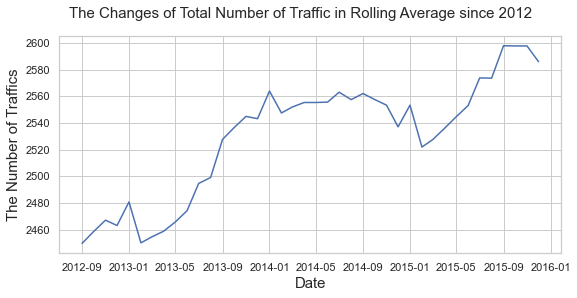

In [14]:
plt.figure(figsize=[9,4])
plt.grid(True)
plt.plot(storesales_traffic['Date'], storesales_traffic['Traffic_MA(7)'])
plt.xlabel('Date',  fontsize =15)
plt.ylabel('The Number of Traffics',  fontsize =15)
plt.suptitle('The Changes of Total Number of Traffic in Rolling Average since 2012 ', fontsize =15)

> In general, the number of traffics has been increasing, since 2012. However, the trend showed a slight decreasing from September 2014 to January 2015. Although from January 2015, the traffic shows increasing trend until the end of 2015. Note that the decreasing trend seems to start again.

### 3.2. The Trend of Sales Amount

In [15]:
# By aggregating each product sale, I calculated total sales per individual day. 
storesales['total_sales'] = storesales.iloc[:, 4:13].sum(axis=1) 

In [16]:
# Then I transformed the daily sales into monthly sales data. 
storesales_sum= storesales.groupby(['Year','Month'], as_index= False )['total_sales'].sum()
storesales_sum['total_sales_MA(7)'] = storesales_sum.iloc[:,2].rolling(window =7).mean()

In [17]:
storesales_sum['Day'] =1
storesales_sum['Date']=pd.to_datetime(storesales_sum[['Year', 'Month','Day']], format='%Y-%m-%d', errors='coerce')

Text(0.5, 0.98, 'The Changes of Total Sales in Rolling Average (12 months) since 2012 ')

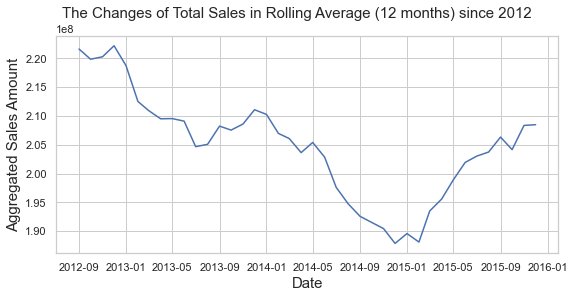

In [18]:
plt.figure(figsize=[9,4])
plt.grid(True)
plt.plot(storesales_sum['Date'], storesales_sum['total_sales_MA(7)'])
plt.xlabel('Date',  fontsize =15)
plt.ylabel('Aggregated Sales Amount',  fontsize =15)
plt.suptitle('The Changes of Total Sales in Rolling Average (12 months) since 2012 ', fontsize =15)

>- Next, I investigated the total sales of the company across the stores. Unlike traffic trend, the aggregated sales have been decreasing since 2012 until beginning of 2015. In 2020, the total sales amount of the company reached about 220 Million USD. However at the end of 2014, it recorded about 190 Million USD. In other words, ca. 13.64 % of Sales are decreased between 2012 and 2014. 
>- Note that from the previous plot, the traffic showed an increasing trend during that period. This indicates the fact that it is very likely more and more people visited the company's stores, but they spent less money. The company should find a solution for this issue.


### 3.3. Product Categories Popularity Comparison

In [19]:
# Aggregate the sales data into each year
cols = storesales.iloc[:, 4:].columns
storesales_per_store = storesales.groupby('Year')[cols].sum()
storesales_per_store_pct = storesales_per_store.div(storesales_per_store['total_sales'],axis =0)
storesales_per_store_pct = storesales_per_store_pct.iloc[:,:-1]
storesales_per_store_pct 

,Dry_Grocery,Dairy,Frozen_Food,Meat,Produce,Floral,Deli,Bakery,General_Merchandise
Year,,,,,,,,,
2012,0.448256,0.099573,0.074768,0.112188,0.111267,0.007339,0.042356,0.026958,0.077296
2013,0.446257,0.103329,0.077083,0.112390,0.106477,0.007757,0.040979,0.027173,0.078556
2014,0.439573,0.106434,0.079635,0.108639,0.113775,0.009551,0.044307,0.030026,0.068060
2015,0.447395,0.101677,0.078529,0.111321,0.109943,0.008272,0.040951,0.027516,0.074396


In [20]:
storesales_per_store_pct.sum().sort_values(ascending= False)

Dry_Grocery            1.781481
Meat                   0.444538
Produce                0.441462
Dairy                  0.411012
Frozen_Food            0.310015
General_Merchandise    0.298308
Deli                   0.168593
Bakery                 0.111672
Floral                 0.032918
dtype: float64

In [21]:
storesales_per_store_pct = storesales_per_store_pct[['Dry_Grocery', 'Meat', 'Produce', 'Dairy', 'Frozen_Food', 
                                                     'General_Merchandise', 'Deli', 'Bakery','Floral' ]]

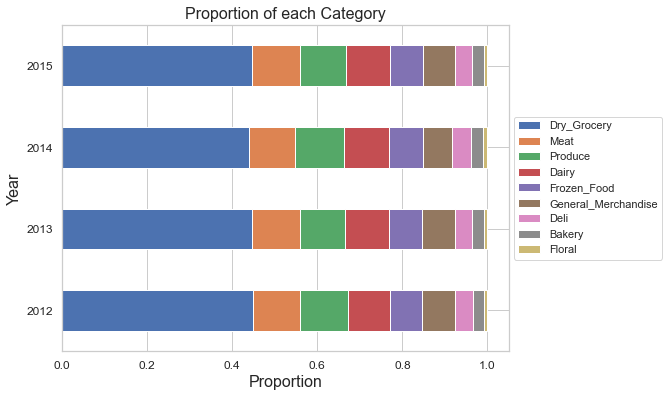

In [22]:
storesales_per_store_pct.plot( kind = 'barh', stacked =True, fontsize = 12, figsize =(8,6))
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.ylabel('Year', fontsize = 16)
plt.xlabel('Proportion', fontsize = 16)
plt.title( 'Proportion of each Category', fontsize = 16)
plt.show()

> Next, I compared the popularity of each product category. The company provides their customers various products, which are classified into roughly 9 different categories. Dry Grocery products are the most popular to the customers. The next popualar product categories are Meat, Produce and Dairy. Floral category, however accounts for the least proportion of whole sales in the company.

### 3.4.  Demographic Features of Customers

> As earlier mentioned, the demographic dataset contains various information about the potential customers of the company. Thus, I start with this sub-section by splitting the dataset based on the features. 

In [23]:
store_merged = storeinfo.merge(demographic, how ='inner', left_on = 'Store', right_on = 'Store')

In [24]:
# Split the dataset based on the features
# 1. Age data
age_data = store_merged.iloc[:, 5:14]
age_mod=age_data.groupby('Type')[age_data.columns].mean()
# 2. Education data
education_data =store_merged.iloc[:, np.r_[5, 14:22]]
education_mod=education_data.groupby('Type')[education_data.columns].mean()
# 3. Household Size data 
hh_size_data = store_merged.iloc[:, np.r_[5, 22:27]]
hh_size_mod=hh_size_data.groupby('Type')[hh_size_data.columns].mean()
# 4. Household Income data
hh_income_data = store_merged.iloc[:,np.r_[5, 27:34]]
hh_income_mod=hh_income_data.groupby('Type')[hh_income_data.columns].mean()
# 5. Ethnic Data 
ethnic_data = store_merged.iloc[:, np.r_[5, 34:42]]
ethnic_mod=ethnic_data.groupby('Type')[ethnic_data.columns].mean()
# 6. Housing Value Data 
housing_value_data = store_merged.iloc[:, np.r_[5, 42:49]]
housing_value_mod=housing_value_data.groupby('Type')[housing_value_data.columns].mean()
# 7. Population Density
population_density = store_merged.iloc[:, np.r_[0,2:6, 49]]

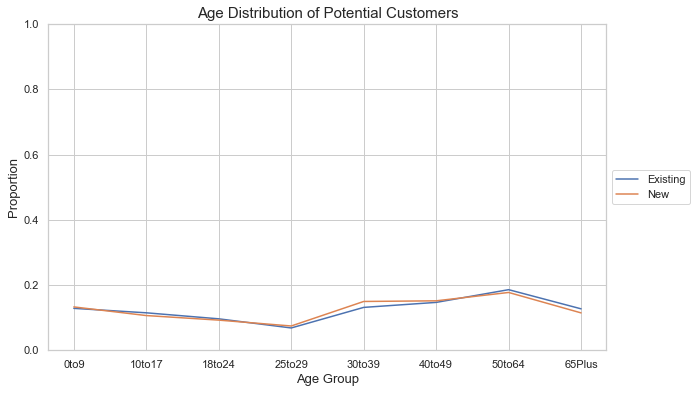

In [25]:
ages_cols = age_mod.columns.tolist()
ages_cols = [w.replace('Age', '') for w in ages_cols]
age_mod.columns = ages_cols
age_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0))

plt.title('Age Distribution of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Age Group',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> **1. Age Group:** According to the age group plot, the largest age group is 50 to 64 years old group. The second largest groups are the people in "30 to 39", "40 to 49", and "0 to 9 years old groups.Thoes customers could be speculated as young families or young parents with children. Note that the distributions of the age groups between existing stores and new stores look similar.


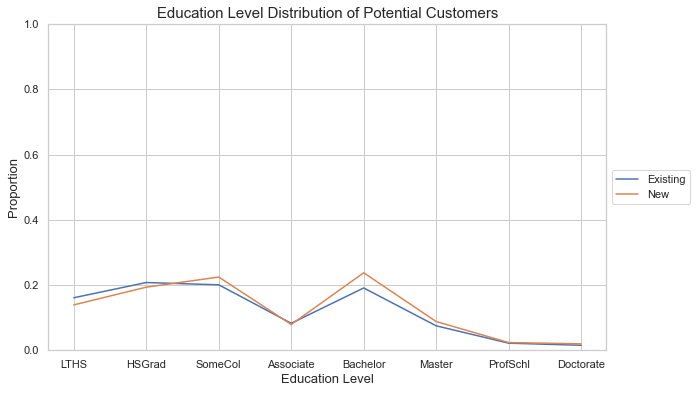

In [26]:
edu_cols = education_mod.columns.tolist()
edu_cols = [w.replace('Ed', '') for w in edu_cols]
education_mod.columns = edu_cols
education_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0))

plt.title('Education Level Distribution of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Education Level',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> **2. Education Level:** According to the Education Level group plot, the three largest education groups are High School Graduates(HSGrad), Some Colleges (SomeCol), and Bachelor. The three groups account for ca. 60 % of whole potential customers. On the other hand, high-educated group such as people with master degree, professor scholar (ProfSchl), or Doctoratef shows very low proportions.
Remember that the bar plots of each education group between existing stores and new stores look very similar.

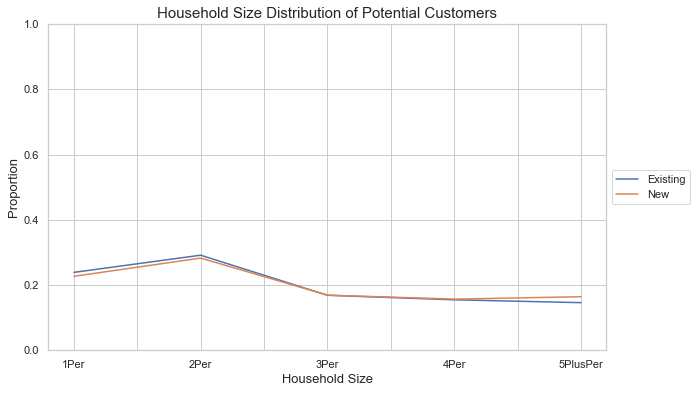

In [27]:
size_cols = hh_size_mod.columns.tolist()
size_cols = [w.replace('HHSz', '') for w in size_cols]
hh_size_mod.columns = size_cols
hh_size_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0))

plt.title('Household Size Distribution of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Household Size',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> **3. Household Size:** According to the plot, small sizes of households (1 or 2 persons) constitute more than half of potential customers of the company. However, the proportions of bigger household sizes (more than 2 persons) are not negligible. Notice that the plots of each household size group between existing stores and new stores look very similar.

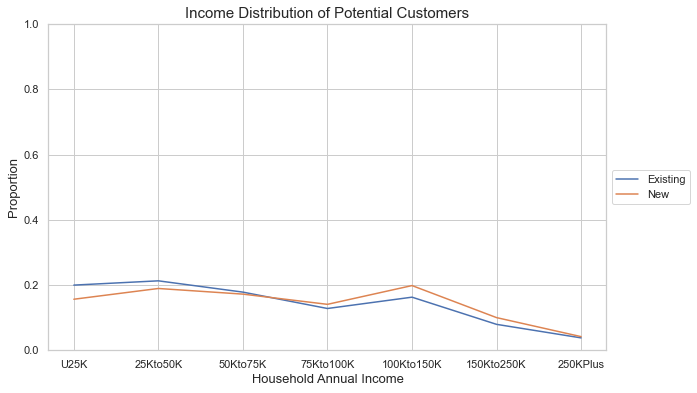

In [28]:
inc_cols = hh_income_mod.columns.tolist()
inc_cols = [w.replace('HHInc', '') for w in inc_cols]
hh_income_mod.columns = inc_cols
hh_income_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0))

plt.title('Income Distribution of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Household Annual Income',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> **4. Household Annual Income:** The aboved-displayed graph shows that low level annual income households (under 75,000 USD annual income (U25K, 25Kto50K, 50Kto75K))  make up the largest part. Then the middle income groups (annual income between 75,000 and 150,000 USD(75Kto100K, 100Kto150K)) are following. The proportion of high income households (annual income more than 150,000 USD (150Kto250K, 250KPlus)) are relatively low. Like the preivous plots, the distributions of household income between existing stores and new stores look very similar.

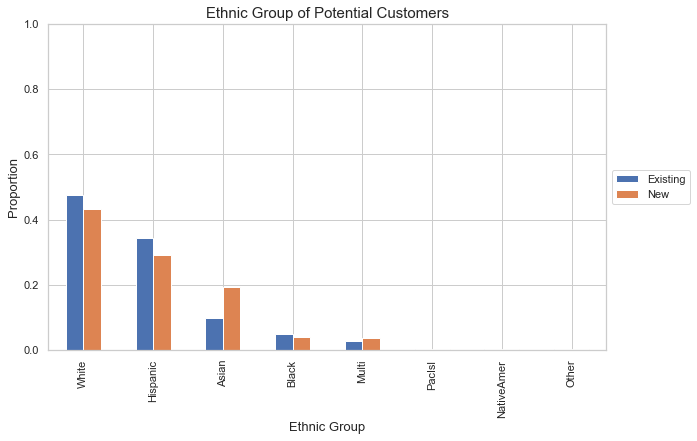

In [29]:
eth_cols = ethnic_mod.columns.tolist()
eth_cols = [w.replace('Pop', '') for w in eth_cols]
ethnic_mod.columns = eth_cols
ethnic_order = ethnic_mod.mean().sort_values(ascending= False).index
ethnic_mod = ethnic_mod[ethnic_order]
ethnic_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0), kind ='bar', sort_columns = True)

plt.title('Ethnic Group of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Ethnic Group',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

> **5. Ethnic:** Next, I investigate the proportion of different ethnic group of potential customers. The largest ethnicity is white people. Whites account for more than 40% of whole population around existing and new stores. The second largest group is Hispanic. Asian is the third largest ethnic group. The distribution order of different ethinc groups around exising and new stores are similar. However, note that the proportion of Asian around new stores are twice as much as around existing stores. 

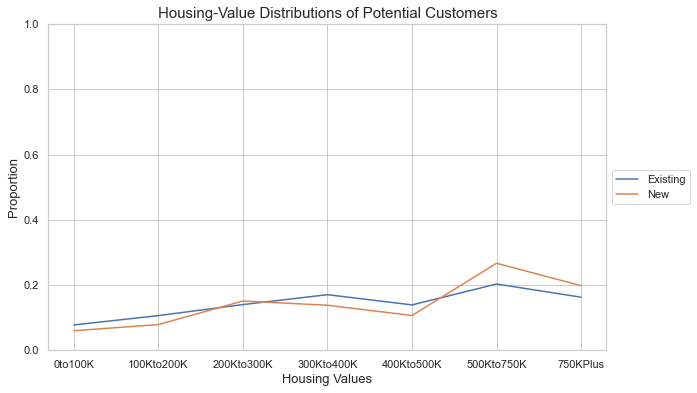

In [30]:
hv_cols = housing_value_mod.columns.tolist()
hv_cols = [w.replace('HVal', '') for w in hv_cols]
housing_value_mod.columns = hv_cols
housing_value_mod.T.plot(figsize=(10,6), ylim=(0.0, 1.0))

plt.title('Housing-Value Distributions of Potential Customers', fontsize =15)
plt.ylabel('Proportion', fontsize =13)
plt.xlabel('Housing Values',fontsize =13 )
plt.legend( bbox_to_anchor = (1, 0.5), loc = 6)
plt.show()

>**6. Housing Values:** In the areas near to existing stores, there are more high-value houses than low-value houses. Houses with high values (500Kto750K, 750KPlus) constitute ca. 40 percent of whole houses. On the other hand, the proportion of houses valued less than 200K, accounts for ca. 20% of whole houses around the area. The similar pattern appears in the area around new stores. However, the proportion of high-value houses are a little bit larger than that of low-value houses. 

Text(0.5, 1.0, 'Population Density Comparison')

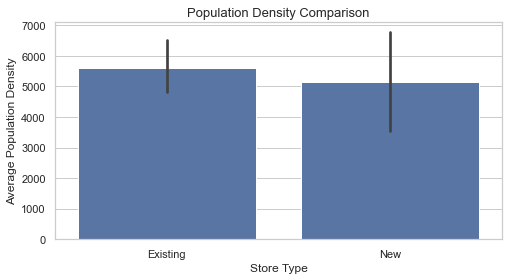

In [31]:
plt.figure(figsize=[8,4])
base_color = sns.color_palette()[0]
sns.barplot(data = population_density, x = 'Type', y = 'PopDens' ,color = base_color)
plt.ylabel('Average Population Density')
plt.xlabel('Store Type')
plt.title('Population Density Comparison', fontsize = 13)

In [32]:
# Import the package for t-test
from scipy import stats

# T-test result
existing_stores = population_density[['PopDens','Type']].query('Type == "Existing"')
new_stores = population_density[['PopDens','Type']].query('Type == "New"')
print (stats.ttest_ind(existing_stores.PopDens, new_stores.PopDens, equal_var = False))

Ttest_indResult(statistic=0.4321652033481138, pvalue=0.6719268807151272)


>**7. Population Density:** Finally, I compare the average population density of the area around existing and new stores. According to the barplot, it seems that the average population density near to existing stores is a little bit higher than the density near to new stores. However, the t-test result tells that the average population density of the areas near to existing and new stores are NOT statistically different at a significant level 0.05.